In [30]:
import climate_data as cdata
import pathlib
from matplotlib import pyplot as plt
from importlib import reload
reload(cdata)

<module 'climate_data' from 'C:\\thin\\02_Code\\python_data_processing\\climate_data\\climate_data.py'>

In [31]:
dl = cdata.DMITypeLong()

--Return--
None
> c:\thin\02_code\python_data_processing\climate_data\climate_data.py(1496)read_data()
   1494             self.datasets['AP'] = AirPressure(AP=df_station[df_station['parameter']=='AT']['value'])
   1495 
-> 1496         pdb.set_trace()
   1497 
   1498 class NESDISType(ClimateDataSetBase):



ipdb>  self.datasets


{'AT': <climate_data.AirTemp object at 0x0000028A835A22B0>}


ipdb>  self.datasets['AT']


ipdb>  c


<AxesSubplot:>

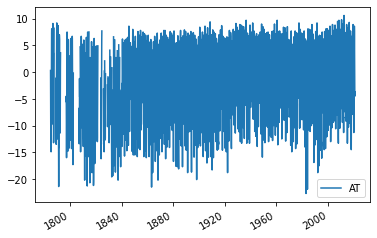

In [35]:
dl.datasets['AT'].raw_data.plot()

In [37]:
dl.datasets['AT'].raw_data

,AT
1784-01-15,NaN
1785-01-15,-14.8
1786-01-15,-9.7
1787-01-15,-13.2
1788-01-15,NaN
...,...
2016-12-15,-7.3
2017-12-15,-3.4
2018-12-15,-3.8
2019-12-15,-5.9


 
Processing site: SIS04230
Writing "Daily mean Tair" sheet...
Writing "Mean annual Tair" sheet...
file: SIS04230_weather_proccessed_new2.xlsx exists!
Writing "FDD and TDD" sheet...
done!
 
Processing site: SIS04234
Writing "Daily mean Tair" sheet...
Writing "Mean annual Tair" sheet...
file: SIS04234_weather_proccessed_new2.xlsx exists!
Writing "FDD and TDD" sheet...
done!


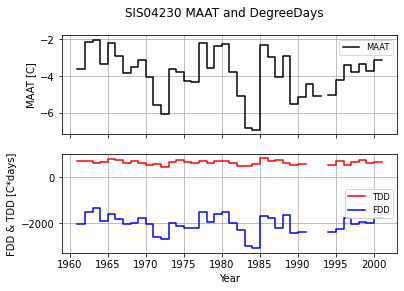

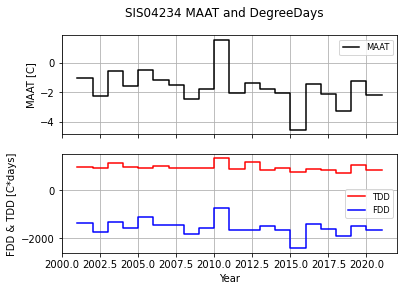

In [2]:
from climate_data import write_xlsx, plot_maat_dd

stations = {}
stations['SIS04230'] = cdata.DMIUnified('4230')
stations['SIS04234'] = cdata.DMIUnified('4234')



for key in stations.keys():
    # loop through each station

    print(' ')
    print('Processing site: {0}'.format(key))

    # Calculate mean annual air temperature
    maat = stations[key].datasets['AT'].calc_MAAT()

    # Calculate freezing and thawing degree days
    dd = cdata.DegreeDays(AT=stations[key].datasets['AT']).degree_days

    # Write air temperatures to excel file
    print('Writing "Daily mean Tair" sheet...')

    out_file = '{0}_weather_proccessed_new2.xlsx'.format(key)
    # file = write_xlsx(out_file,                  # filename to write to    
    #                   stations[key].AT_mean,     # dataframe to write
    #                   'Daily mean Tair',         # name of the sheet in the excel file
    #                   drop_cols=['stat_no', 'year', 'month', 'day', 'weekday', 'hour', 'minute'],   # names of columns NOT to write
    #                   overwrite=True)            # overwrites file if it exists (if False, an integer will be appended to the filename to make it unique)

    # Write mean annual air temperatures to excel file
    print('Writing "Mean annual Tair" sheet...')
    file = write_xlsx(out_file, maat, 'Mean annual Tair w stats', overwrite=True)

    # Write freezing and thawing indices to excel file
    print('Writing "FDD and TDD" sheet...')
    file = write_xlsx(file, dd, 'FDD and TDD', overwrite=True)

    # finally close the file
    file.close()
    print('done!')

    # plot mean annual air temperature and degree days
    plot_maat_dd(maat, dd, title='{0} MAAT and DegreeDays'.format(key),
                 skip=True, plot_corrected=False)

    # save the figure to a png file
    plt.savefig('{0}_MAAT_dd.png'.format(key), dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format=None,
                transparent=False, bbox_inches=None, pad_inches=0.1)



Constructing combined time series for Sisimiut
Dataset SD only present in first dataset. No scale/debias possible.
Dataset SD only present in first dataset. Copied, no merge possible.
Writing "Daily mean Tair" sheet...
Writing "Mean annual Tair" sheet...
Writing "FDD and TDD" sheet...
done!


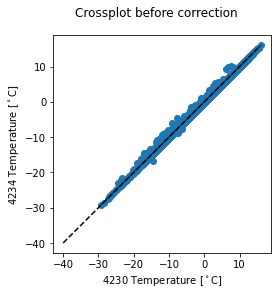

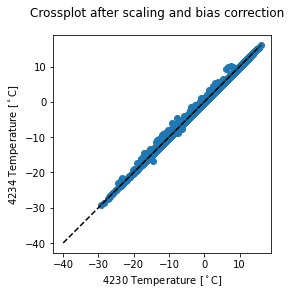

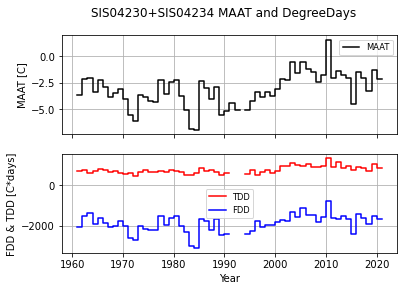

In [28]:
# SIS04230 and SIS04234 are data from two weather stations in
# the Sisimiut area which had overlapping data collection
# periods.
# We may approximate a continuous timeseries from the two by
# combining the two after scaling and bias correcting the
# on to the other.

from climate_data import cross_plot_temp

print('')
print('Constructing combined time series for Sisimiut')

# Produce a cross plot of the overlapping part of two timeseries
ax = cross_plot_temp(stations['SIS04230'],stations['SIS04234'], title='Crossplot before correction')

# Perform scaling and bias correction of older timeseries to 
# newer timeseries, and return a new station instance.
new = stations['SIS04230'].scale_debias_to(stations['SIS04234'])

# plot a new cross plot of the corrected station data
ax = cross_plot_temp(new,stations['SIS04234'], title='Crossplot after scaling and bias correction')

# Merge the scaled and bias corrected timeseries with the data 
# from the ILU04221 station
new = new.merge_with(stations['SIS04234'])

# Now that we have the full time series, calculate mean 
# annual air temperature and degree days statistics.
maat = new.datasets['AT'].calc_MAAT()
dd = cdata.DegreeDays(AT=new.datasets['AT']).degree_days

# Write air temperatures to excel file
print('Writing "Daily mean Tair" sheet...')

out_file = '{0}_weather_proccessed.xlsx'.format('SIS04230+SIS04234')
file = write_xlsx(out_file,                  # filename to write to    
                    new.datasets['AT'].daily_avg,     # dataframe to write
                    'Daily mean Tair',         # name of the sheet in the excel file
                    overwrite=True)            # overwrites file if it exists (if False, an integer will be appended to the filename to make it unique)

# Write mean annual air temperatures to excel file
print('Writing "Mean annual Tair" sheet...')
file = write_xlsx(file, maat, 'Mean annual Tair w stats', overwrite=True)

# Write freezing and thawing indices to excel file
print('Writing "FDD and TDD" sheet...')
file = write_xlsx(file, dd, 'FDD and TDD', overwrite=True)

# finally close the file
file.close()
print('done!')

# ... and plot it
plot_maat_dd(maat, dd, title='SIS04230+SIS04234 MAAT and DegreeDays', skip=True)

# ... and save it to a png file.
plt.savefig('SIS04230+SIS04234_MAAT_dd.png'.format(key), dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1)



In [26]:
new.datasets['AT'].daily_avg

,AT,count
1961-01-01,-12.575000,8.0
1961-01-02,-9.237500,8.0
1961-01-03,-12.525000,8.0
1961-01-04,-12.312500,8.0
1961-01-05,-8.850000,8.0
...,...,...
2020-12-29,-3.291667,24.0
2020-12-30,-1.541667,24.0
2020-12-31,-1.216667,24.0
2021-01-01,-4.683333,24.0
